# Проект "Исследование компьютерных игр". Описание 

Интернет-магазин продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные содержат информацию до 2016 года. Необходимо выявить определяющие успешность игры закономерности, позволяющие сделать прогноз на следующий 2017 год и спланировать рекламные кампании. 

## Изучение общей информации

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats as st
import math

pd.set_option('display.float_format', '{:,.2f}'.format) # вывод всех значений в столбцах с двумя знаками после запятой
pd.set_option('display.max_columns', None) # вывод всех столбцов без скрытых за многоточием

# # отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [2]:
# чтение файла
data=pd.read_csv('games.csv')

In [3]:
# посмотрим на общий вид таблицы
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [4]:
# опишем данные методом дексрайб, чтобы увидеть, есть ли аномалии
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


In [5]:
# выведем наименования столбцов, чтобы проверить корректность написания наименований
display(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# посмотрим общие данные датафрейма, количество строк/столбцов, типы данных, пропуски в них
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
data['Name'].value_counts()
print('Количество игр:',len(data['Name'].unique()))

Количество игр: 11560


In [8]:
display(data['Platform'].value_counts())
print('Количество платформ:',len(data['Platform'].unique()))

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

Количество платформ: 31


In [9]:
display(data['Genre'].value_counts())
print('Количество жанров:',len(data['Genre'].unique()))

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

Количество жанров: 13


In [10]:
data['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Вывод: первоначальный взгляд на данные

**Итак, мы имеем датафрейм из 11 колонок, макс.количество строк 16715.**

Все колонки имеют некорректные с точки зрения ситнтаксиса наименования. Следует привести их в порядок: привести к нижнему регистру.

Тип данных в столбце:
- Year_of_Release: float64 (вещественный) - некорректен, следует привести к datetime (датавремя).
- User_Score: object (строка) - некорректен, следует привести к float64 (вещественный).

В следующих столбцах имеются пропуски:
- Name
- Year_of_Release
- Genre
- Critic_Score
- User_Score
- Rating

Датафрейм содержит информацию об 11560 играх 13ти жанров на 31 платформе с 1980 по 2016 годы, рейтинг которых  распределен ассоциацией Entertainment Software Rating Board на 8 типов, где:
- **«E» («Everyone») — «Для всех»** (Первоначально "K-A" ("Kids to Adults")): Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
- **«T» («Teen») — «Подросткам»**: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- **«M» («Mature») — «Для взрослых»**: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- **«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»**: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 
- **«EC» («Early childhood») — «Для детей младшего возраста»**: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. 
- **«RP» («Rating Pending») — «Рейтинг ожидается»**: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.
- **«K-A» ("Kids to Adults")** - то же самое, что и «E», то есть «Для всех».
- **«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением.

Более подробно можно найти по ссылке: https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

Также в данном столбце есть пропуски, скорее всего они вызваны тем, что игре не был присвоен рейтинг упомянутой выше организацией, поэтому в дальнейшем проведем их оценку и примем решение о заполнении/удалении.

## Подготовка данных

**План:**
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
- o	Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- o	Опишите причины, которые могли привести к пропускам;
- o	Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


### корректировка наименований

In [11]:
# скорректируем наименования столбцов в датасете: понизим регистр
data.columns =data.columns.str.lower()
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E


### корректировка типов данных

In [12]:
# внесем корректировки в тип данных столбца 'user_score':
# data['user_score'] = pd.to_numeric(data['user_score'])
# data.info()

# нашла ошибку в значении строки 119, которая содержит странную формулировку tbd. 

try:
    data['user_score'] = pd.to_numeric(data['user_score'])
except:
    print("ошибка...")    
print()
data.info()

ошибка...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [13]:
# посмотрим на уникальные значения стобца 'user_score' и их количество:
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
1.3       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [14]:
#data.loc[data['user_score'] == 'tbd']
data_length = len(data['platform'])
dolya_tbd = ((2424 *100)/data_length) #len(data[data['user_score'] == 'tbd']))
print('Доля значений tbd,%:', dolya_tbd)

Доля значений tbd,%: 14.501944361352079


Видим,  что в столбце user_score имеется загадочное сокращение tbd. Как говорит Google, TBD — это сокращение от To Be Determined. 
То есть, пользователь еще не дал оценку игре, и она только будет в последующем оценена. Присвоим этим значениям на текущий момент 0, и преобразуем данные в вещественный тип.

Прежде, чем менять тип данных в столбце years_of_release обработаем пропуски.

### обработка пропусков

**Приступим к анализу пропусков в датасете.**

Напомним, что пропуски имеются в столбцах:
- name
- year_of_release
- genre
- critic_score
- user_score
- rating

In [15]:
# напишем функцию для расчета пропусков и их доли по отношению ко всему датафрейму:
def count_nan(column):
    count_nan = column.isna().sum()
    return count_nan
def count_dolya_nan(column):
    dolya=100*column.isna().mean()
    return dolya

In [16]:
column = data['name']  
print('Количество пропусков:', count_nan(column))        
print('Доля пропусков,%:', count_dolya_nan(column))


Количество пропусков: 2
Доля пропусков,%: 0.011965300628178284


Количество пропусков в столбце name составило 2шт. % несущественен, поэтому удалим эти строки.

In [17]:
data = data.dropna(subset=['name']).reset_index(drop=True)
print('Количество пропусков "name":', print(data['name'].isna().sum()))

0
Количество пропусков "name": None


In [18]:
column = data['year_of_release']  
print('Количество пропусков:', count_nan(column))        
print('Доля пропусков,%:', count_dolya_nan(column))

Количество пропусков: 269
Доля пропусков,%: 1.6095255190570215


Количество пропусков в столбце 'year_of_release составило 269шт. Но 1.6 % - несущественно для анализа, поэтому удалим эти строки.

In [19]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)
print('Количество пропусков "year_of_release":', print(data['year_of_release'].isna().sum()))

0
Количество пропусков "year_of_release": None


In [20]:
# внесем корректировки в тип данных столбца 'year_of_release':
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y')
data['year']= data['year_of_release'].dt.year
data['year'] = data.year.astype('int64')
# arr = data['year']
# int_year = math.trunc(arr)
# data['year'] = int_year

# data['year_of_release'] = data['year_of_release'].astype('int')
# display(data['year_of_release'].describe())
display(data['year'].describe())
display(data.head())

count   16,444.00
mean     2,006.49
std          5.88
min      1,980.00
25%      2,003.00
50%      2,007.00
75%      2,010.00
max      2,016.00
Name: year, dtype: float64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.00,8,E,2006
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,1985
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,2008
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.00,8,E,2009
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,1996


In [21]:
column = data['genre']  
print('Количество пропусков:', count_nan(column))        
print('Доля пропусков,%:', count_dolya_nan(column))

Количество пропусков: 0
Доля пропусков,%: 0.0


Количество пропусков в столбце genre составило 2шт. % несущественен, поэтому удалим эти строки.

In [22]:
data = data.dropna(subset=['genre']).reset_index(drop=True)
print('Количество пропусков "genre":', print(data['genre'].isna().sum()))

0
Количество пропусков "genre": None


In [23]:
column = data['critic_score']  
print('Количество пропусков:', count_nan(column))        
print('Доля пропусков,%:', count_dolya_nan(column))


Количество пропусков: 8461
Доля пропусков,%: 51.453417659936754


Количество пропусков в столбце critic_score составило 8578 - 51.31%, что составляет половину данных всего датасета. Удаление этих строк невозможно, так как потеряем большую часть данных.

In [24]:
column = data['user_score']  
print('Количество пропусков:', count_nan(column))        
print('Доля пропусков,%:', count_dolya_nan(column))

Количество пропусков: 6605
Доля пропусков,%: 40.166626125030405


Процент пропусков в столбце user_score также высок - 40%.  Рейтинг и оценки критиков часто отсуствуют вместе. Возможно, информация вообще не была добавлена. И заполнять такие пропуски средними/медианами/минимумами и некорректно.  Оставим как есть.

In [25]:
column = data['rating']  
print('Количество пропусков:', count_nan(column))        
print('Доля пропусков,%:', count_dolya_nan(column))

Количество пропусков: 6676
Доля пропусков,%: 40.59839455120409


In [26]:
data['rating'].describe()

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

In [27]:
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Вывод уникальных значений рейтинга ESRB показал наличие неявных дубликатов, например K-A == E, поэтому заменим K-A на E. Значения EC, AO, RP встречаются от 1 до 8 раз, что не является существенным для анализа, поэтому удалим их.

In [28]:
data['rating']=data['rating'].str.replace("K-A", "E")
# data['rating'].value_counts()

In [29]:
# определим индексы строк по рейтингу EC, AO, RP:
display(data.query('rating == "EC"')['rating'])
display(data.query('rating == "AO"')['rating'])
display(data.query('rating == "RP"')['rating'])
# удалим эти строки:
data.drop(labels = [864, 4238, 4964, 5956, 6661, 7466, 9801, 12859, 13245, 14045], axis = 0, inplace = True)
data['rating'].value_counts()

4238     EC
4964     EC
5956     EC
6661     EC
7466     EC
9801     EC
12859    EC
13245    EC
Name: rating, dtype: object

864    AO
Name: rating, dtype: object

14045    RP
Name: rating, dtype: object

E       3924
T       2905
M       1536
E10+    1393
Name: rating, dtype: int64

Как мы заметили ранее, скорее всего пропуски в rating вызваны тем, что игре не был присвоен рейтинг ассоциацией ESRB. Данные пропуски составляют 40% от всего датасета. Это довольно существенное значение, поэтому удаление может привести к потере важных данных. В связи с этим  заменим пропуски на 'to be determined'.

In [30]:
data['rating'] = data['rating'].fillna('to be determined')
print('Количество пропусков в rating:', len(data[data['rating'].isna()]))
display(data['rating'].value_counts())

Количество пропусков в rating: 0


to be determined    6676
E                   3924
T                   2905
M                   1536
E10+                1393
Name: rating, dtype: int64

### проверка на наличие явных дубликатов

In [31]:
print('Количество явных дуликатов:', data.duplicated().sum())
display(data[data.duplicated()].head())

Количество явных дуликатов: 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year


In [32]:
data['rating'] = data['rating'].astype("category")
data['platform'] = data['platform'].astype("category")
data['genre'] = data['genre'].astype("category")
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16434 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16434 non-null  object        
 1   platform         16434 non-null  category      
 2   year_of_release  16434 non-null  datetime64[ns]
 3   genre            16434 non-null  category      
 4   na_sales         16434 non-null  float64       
 5   eu_sales         16434 non-null  float64       
 6   jp_sales         16434 non-null  float64       
 7   other_sales      16434 non-null  float64       
 8   critic_score     7981 non-null   float64       
 9   user_score       9829 non-null   object        
 10  rating           16434 non-null  category      
 11  year             16434 non-null  int64         
dtypes: category(3), datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 3.1 MB


### расчеты суммарного количества продаж во всех регионах

In [33]:
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.00,8,E,2006,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,to be determined,1985,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.00,8,E,2009,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,to be determined,1996,31.38


## Исследовательский анализ данных

### Количество игр в разные годы.
Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [34]:
#display(data.groupby('year_of_release')['name'].value_counts().sort_values(ascending=False))

display(data.groupby('year').agg(games_count=('name', 'count')).reset_index())

,year,games_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Text(0.5, 0, 'years of release')

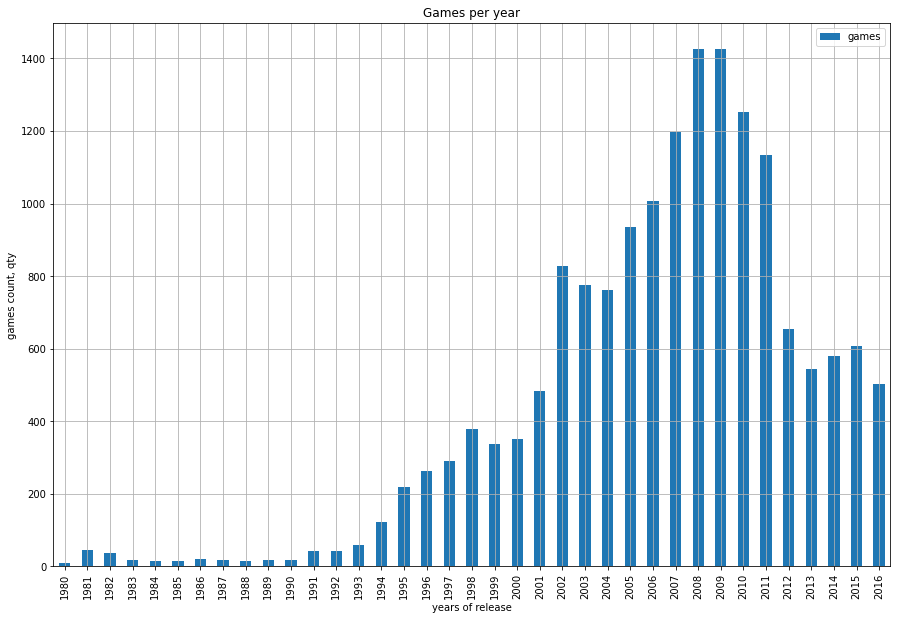

In [35]:
(
    data
    .groupby('year')
    .agg(games_count=('name', 'count'))
    .reset_index()
    .plot(x='year', y='games_count', kind='bar', label="games", title='Games per year', figsize=(15,10),grid=True)
)
# plt.figure(figsize = (15,10))
plt.xticks(rotation=90)
plt.ylabel('games count, qty')
plt.xlabel('years of release')

Группировка данных по годам и количеству выпускаемых игр показала, что в период с 1980 до 2001 количество игр было небольшим. Особенно видно что вплоть до 1993 года наблюдалась стабильно низкая производительность. с 1993 года количество выпускаемых игр стало расти с каждым годом в 2 раза. Так с 1993 года по 2008 наблюдался постоянный рост с максимальным количеством в 1427 игр, причем в 2002 произошло резкое увеличение количества игр. Далее возник спад до 2013 года и стабилизация на уровне 500-600 игр в год до 2016 года.

Таким образом, наиболее важным периодом для анализа будет период с 2002 по 2016 годы.

### Продажи видеоигр

Посмотрим, как менялись продажи.

#### продажи по годам

Text(0, 0.5, 'Sales')

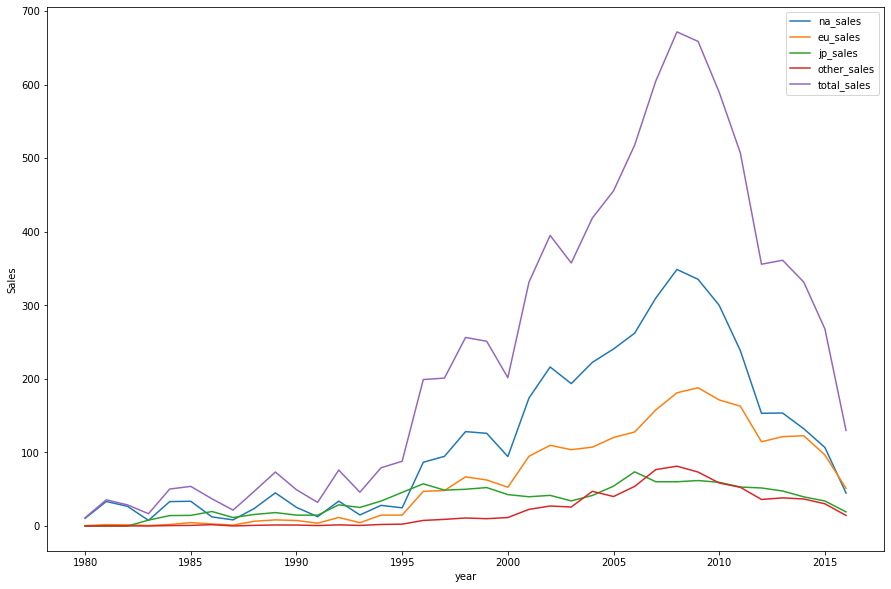

In [36]:
sales_df = data[[x for x in data.columns if 'sales' in x] + ['year']]
sales_df.groupby('year').sum().plot(figsize=(15,10))
# plt.figure(figsize = (15,10))
plt.ylabel('Sales')

Судя по линейному графику продажи начали расти с 1995 года вплоть до 2008-2009 годов. Далее пошел спад.

Посмотрим, как менялись продажи по платформам. 

#### продажи по платформам

In [37]:
# сгруппируем данные по платформе и году, и посчитаем суммарно продажи:
df_sales_platforms = data.groupby(['platform', 'year']).agg(sales=('total_sales', 'sum')).reset_index() 
df_sales_platforms

,platform,year,sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
1142,XOne,2012,0.00
1143,XOne,2013,18.96
1144,XOne,2014,54.07
1145,XOne,2015,60.14


Построим распределение по годам.

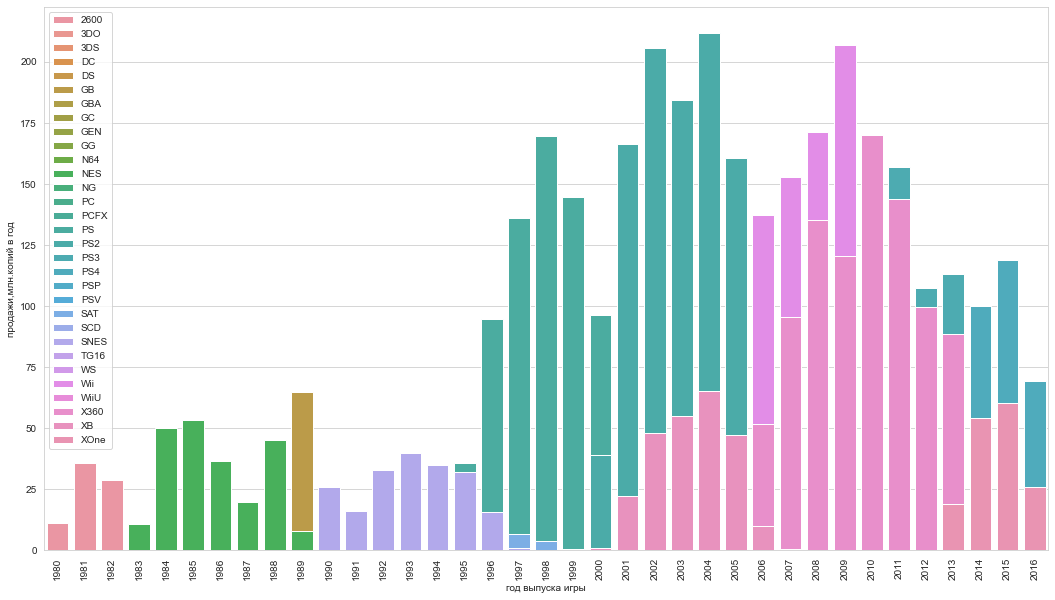

In [38]:
plt.figure(figsize = (18,10))
sns.set_style('whitegrid')
sns.barplot(data=df_sales_platforms, x="year",
            y="sales", hue="platform", ci=None, dodge=False)
plt.xticks(rotation=90)
plt.ylabel('продажи,млн.копий в год')
plt.xlabel('год выпуска игры')
# Add a legend and informative axis label
plt.legend(loc="upper left")

Судя по графику большую популярность игры приобрели с 1996 года, когда продажи выросли в несколько раз по сравнению с предыдущими годами. 

Выберем платформы с наибольшими суммарными продажами. Построим распределение по годам с целью определить, за какой характерный срок появляются новые и исчезают старые платформы.

In [39]:
# посчитаем продажи по каждой платформе и выведем их по убыванию, чтобы посмотреть на 
# платформы с наибольшими суммарными продажами:
df_total_sales_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
df_total_sales_platforms

,platform,total_sales
0,PS2,"1,233.32"
1,X360,961.24
2,PS3,931.34
3,Wii,890.52
4,DS,802.13
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


#### Платформы с макс.продажами

In [40]:
# выделим первые 4 платформы, как платформы с наибольшими суммарными продажами:
df_platforms_top_sales = df_total_sales_platforms.head(4)
# сделаем выборку в общем датафрейме по всем строкам с данными платформами
# df_top_platforms = data.query('platform in @df_platforms_top_sales.index')
df_top_platforms = data[data['platform'].isin(("PS2", "X360", "PS3", "Wii"))]
df_top_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.00,8,E,2006,82.54
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,2008,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.00,8,E,2009,32.77
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E,2006,28.91
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E,2009,28.32


<AxesSubplot:xlabel='year', ylabel='total_sales'>

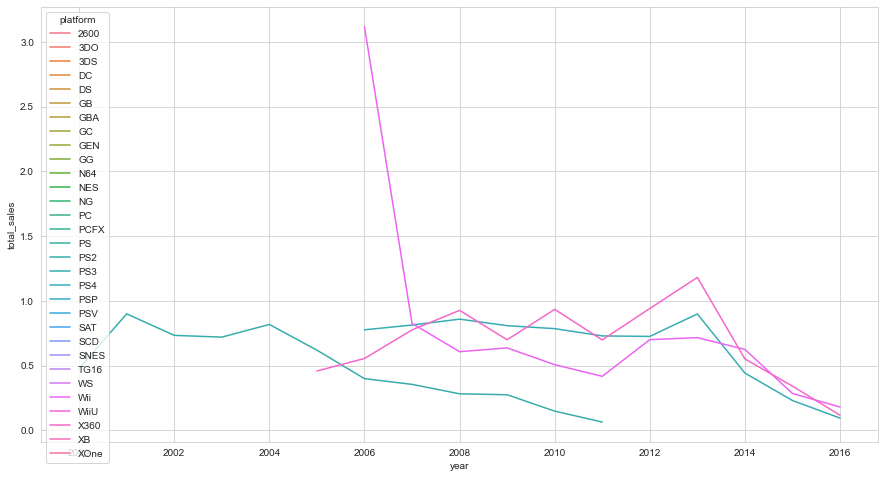

In [41]:
# построим линейный график изменения продаж по годам в данных платформах:
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.lineplot(data=df_top_platforms, x='year', y='total_sales', hue='platform', ci=None)

Судя по графику, в указанный период времени происходили резкие изменения, появления новых и исчезновение старых платформ составляет 10 лет. 

Актуальным периодом для анализа продаж видеоигр с точки зрения прогноза на 2017год будет период в 3-4 предыдущих года.

In [42]:
# сделаем срез по актуальному периоду:
data_actual = data.query('year>=2013')
data_actual.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,year,total_sales
count,"2,233.00","2,233.00","2,233.00","2,233.00",991.00,"2,233.00","2,233.00"
mean,0.20,0.18,0.06,0.05,72.02,"2,014.48",0.49
std,0.55,0.51,0.23,0.17,12.84,1.09,1.24
min,0.00,0.00,0.00,0.00,13.00,"2,013.00",0.01
25%,0.00,0.00,0.00,0.00,66.00,"2,014.00",0.03
50%,0.02,0.03,0.01,0.01,74.00,"2,014.00",0.11
75%,0.15,0.13,0.05,0.04,81.00,"2,015.00",0.40
max,9.66,9.09,4.35,3.96,97.00,"2,016.00",21.05


In [43]:
# выделим в данном срезе платформы с наибольшими суммарными продажами:
df_total_sales_platforms_actual = data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
df_total_sales_platforms_actual


,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


##### диаграмма размаха для топ5 платформ

In [44]:
# наиболее прибыльными оказались платформы ''PS4', ''X360', 'PS3', 'XOne', '3DS' 
# построим для них диаграмму размаха, чтобы оценить продажи

df_top_platforms_actual = data_actual[data_actual['platform'].isin(("3DS", "X360", "PS3", "PS4", "XOne"))]

<AxesSubplot:xlabel='total_sales', ylabel='platform'>

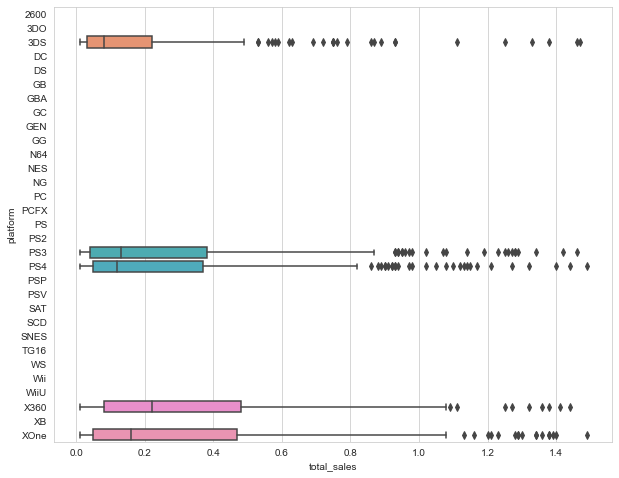

In [45]:
plt.figure(figsize = (10,8))
sns.boxplot(data=df_top_platforms_actual.query('total_sales<1.5'), x='total_sales', y='platform')

In [46]:
df_top_platforms.query('platform=="PS3"')['total_sales'].describe()

count   1,306.00
mean        0.71
std         1.40
min         0.00
25%         0.11
50%         0.28
75%         0.76
max        21.05
Name: total_sales, dtype: float64

**Итак, по продажам лидируют платформы: PS4, PS3, XOne, 3DS, X360**

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

#### PS3. Оценки критиков и пользователей.

In [47]:
df_ps3=data_actual.query('platform == "PS3"')
df_ps3.describe()

,na_sales,eu_sales,jp_sales,other_sales,critic_score,year,total_sales
count,345.00,345.00,345.00,345.00,121.00,345.00,345.00
mean,0.18,0.20,0.07,0.08,70.20,"2,014.07",0.53
std,0.52,0.66,0.11,0.26,14.33,1.01,1.45
min,0.00,0.00,0.00,0.00,13.00,"2,013.00",0.01
25%,0.00,0.00,0.00,0.00,63.00,"2,013.00",0.04
50%,0.03,0.02,0.03,0.01,73.00,"2,014.00",0.15
75%,0.16,0.15,0.09,0.07,80.00,"2,015.00",0.51
max,7.02,9.09,0.98,3.96,97.00,"2,016.00",21.05


Помним, что во время предобработки мы выявили пустые значения в столбце "user_score" и "critic_score". Удалим строки с пустыми значениями в данном срезе, чтобы сделать анализ. И поменяем тип данных на вещественный. Также в "user_score" имеются значения tbd. Удалим эти строки.

In [48]:
df_ps3['user_score'].describe()

count     209
unique     58
top       tbd
freq       23
Name: user_score, dtype: object

In [49]:
# определим индексы строк по рейтингу user_score с значением tbd:
display(df_ps3.query('user_score == "tbd"')['user_score'])

# удалим эти строки:
df_ps3.drop(labels = [8430, 9904, 9948, 10241, 10354,10893, 11038, 12472, 12523, 12566, 12741, 13163, 13226, 13566, 14261, 14452, 14616, 14887, 15330, 15628, 15639, 16098, 16367], axis = 0, inplace = True)

8430     tbd
9904     tbd
9948     tbd
10241    tbd
10354    tbd
10893    tbd
11038    tbd
12472    tbd
12523    tbd
12566    tbd
12741    tbd
13163    tbd
13226    tbd
13566    tbd
14261    tbd
14452    tbd
14616    tbd
14887    tbd
15330    tbd
15628    tbd
15639    tbd
16098    tbd
16367    tbd
Name: user_score, dtype: object

In [50]:
df_ps3=df_ps3.dropna(subset=['user_score', 'critic_score']).reset_index(drop=True)

df_ps3['user_score'] = pd.to_numeric(df_ps3['user_score'])

Построенный ранее boxplot(диаграмма размаха) показала, что для платформы PS3 выбросы значений по продажам идут после 0.9 млн.копий. Построим графики с учетом этого значения: .query('total_sales<=0.9')

Text(0.5, 0, 'total_sales/Продажи')

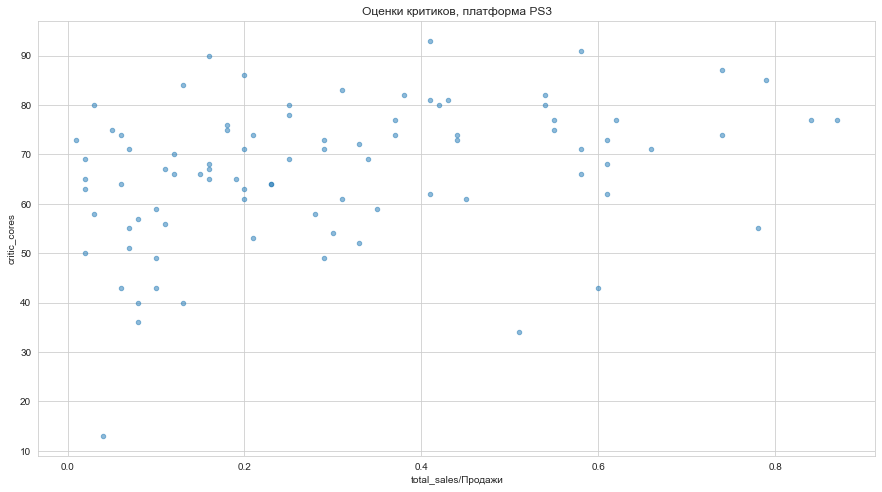

In [51]:
df_ps3.query('total_sales<=0.9').plot(x='total_sales', y='critic_score', kind="scatter", alpha=0.5, title = 'Оценки критиков, платформа PS3', figsize=(15,8))
plt.ylabel('critic_cores')
plt.xlabel('total_sales/Продажи')

Text(0.5, 0, 'total_sales/Продажи')

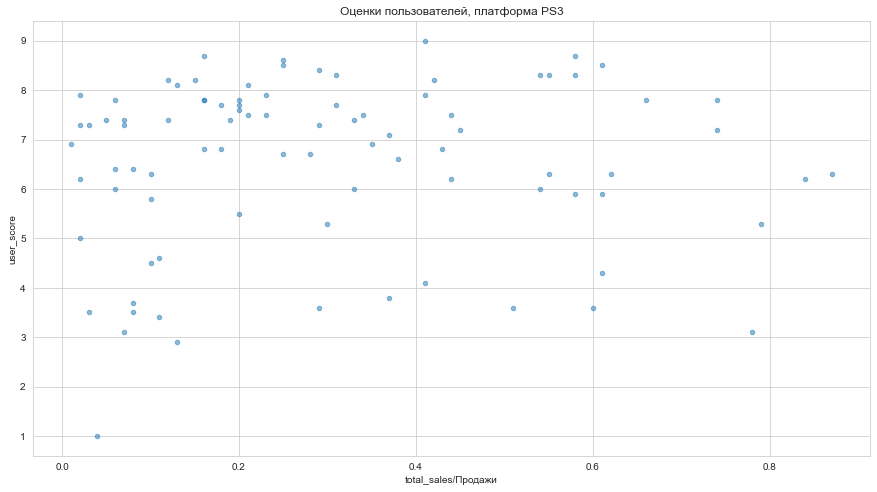

In [52]:

df_ps3.query('total_sales<=0.9').plot(x='total_sales', y='user_score', kind="scatter", alpha= 0.5, title = 'Оценки пользователей, платформа PS3', figsize=(15,8)) 

plt.ylabel('user_score')
plt.xlabel('total_sales/Продажи')


In [53]:
# Для всех пар столбцов найдем коэффициент корреляции. 
df_ps3_final = df_ps3.query('total_sales<=0.9')[['critic_score', 'user_score', 'year', 'total_sales']] # оставим только нужные столбцы
df_ps3_final.corr()

,critic_score,user_score,year,total_sales
critic_score,1.00,0.70,-0.11,0.34
user_score,0.70,1.00,-0.17,0.05
year,-0.11,-0.17,1.00,-0.30
total_sales,0.34,0.05,-0.30,1.00


Влияние на продажи оценок критиков значительно ввиду того, что коэф.корр=0.34. С ростом оценок растут продажи. Оценки пользователей при этом не влияют на продажи.

In [54]:
# формируем срез:
data_actual_scores = data_actual.query('platform!="PS3"')
data_actual_scores=data_actual_scores.dropna(subset=['user_score', 'critic_score']).reset_index(drop=True)
data_actual_scores = data_actual_scores.query('user_score!="tbd"')
data_actual_scores['user_score'] = pd.to_numeric(data_actual_scores['user_score'])

Остальные платформы: 
PS4, XOne, 3DS, X360

In [55]:
# подготовим срезы по платформам
df_ps4 = data_actual_scores.query('platform=="PS4"')
df_xone = data_actual_scores.query('platform=="XOne"')
df_3ds = data_actual_scores.query('platform=="3DS"')
df_x360 = data_actual_scores.query('platform=="X360"')

In [56]:
# отсечем выбросы с учетом диаграммы размаха в п.п. 4.2.3.1
display('platform="PS4"', df_ps4.query('total_sales <= 0.8')[['critic_score', 'user_score', 'year', 'total_sales']].corr())
display('platform="XOne"', df_xone.query('total_sales<=1.1')[['critic_score', 'user_score', 'year', 'total_sales']].corr())
display('platform="3DS"', df_3ds.query('total_sales<=0.5')[['critic_score', 'user_score', 'year', 'total_sales']].corr())
display('platform=="X360"', df_x360.query('total_sales<=1.1')[['critic_score', 'user_score', 'year', 'total_sales']].corr())

'platform="PS4"'

,critic_score,user_score,year,total_sales
critic_score,1.00,0.67,0.10,0.29
user_score,0.67,1.00,0.23,0.06
year,0.10,0.23,1.00,-0.20
total_sales,0.29,0.06,-0.20,1.00


'platform="XOne"'

,critic_score,user_score,year,total_sales
critic_score,1.00,0.57,0.18,0.37
user_score,0.57,1.00,0.13,-0.04
year,0.18,0.13,1.00,-0.27
total_sales,0.37,-0.04,-0.27,1.00


'platform="3DS"'

,critic_score,user_score,year,total_sales
critic_score,1.00,0.73,0.28,0.16
user_score,0.73,1.00,0.20,0.03
year,0.28,0.20,1.00,-0.25
total_sales,0.16,0.03,-0.25,1.00


'platform=="X360"'

,critic_score,user_score,year,total_sales
critic_score,1.00,0.62,-0.15,0.40
user_score,0.62,1.00,-0.09,0.23
year,-0.15,-0.09,1.00,-0.21
total_sales,0.40,0.23,-0.21,1.00


Ситуация с влиянием оценок критиков и пользователей по всем остальным платформам такая же, что и по платформе PS3. Коэффициенты корреляции по оценкам критиков говорят о прямом влиянии на продажи в сторону роста. Оценки пользователей в основном не влияют на продажи. 

#### Жанры

Посмотрим на общее распределение игр по жанрам. 
- что можно сказать о самых прибыльных жанрах?
- Выделяются ли жанры с высокими и низкими продажами?

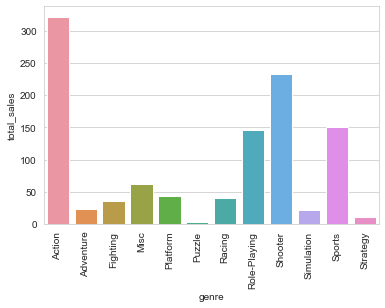

In [57]:
platform_genre_sales_new=data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=platform_genre_sales_new,y='total_sales',x='genre')
plt.xticks(rotation=90);

Видим, что наиболее прибыльные жанры Action, Shooter и Sports. Посмотрим на жанры с точки зрения медианных значений продаж:

In [58]:
#genre_sales = data_actual.groupby(['genre']).agg(sales_median=('total_sales', 'median'), sales_mean=('total_sales', 'mean'), sales_sum=('total_sales', 'sum')).sort_values(by='sales_median',ascending=False).reset_index()
genre_sales = data_actual.groupby('genre')['total_sales'].median().sort_values(ascending=False).reset_index()
#platform_genre_sales_new=data_actual.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
genre_sales

,genre,total_sales
0,Shooter,0.45
1,Sports,0.24
2,Platform,0.22
3,Role-Playing,0.12
4,Fighting,0.12
5,Racing,0.12
6,Action,0.11
7,Simulation,0.10
8,Misc,0.10
9,Strategy,0.08


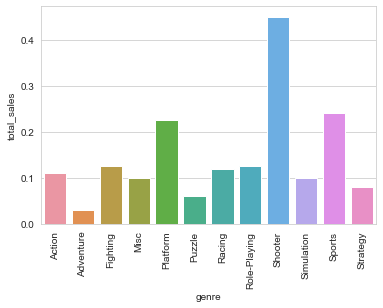

In [59]:
# построим график распределения продаж в жанрах
sns.barplot(data=genre_sales,y='total_sales',x='genre')
plt.xticks(rotation=90);

График и медианные значения дают иное распределение по лидирующим жанрам:
    
    1. Shooter
    2. Sports
    3. Platrform
    4. Role-Playing
    5. Fighting
  

## Портрет пользователя каждого региона

**ПЛАН.** Составьте портрет пользователя каждого региона.

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


### Регион NA/Северная Америка

#### Общий анализ

,platform,year,sales
0,2600,1980,10.59
1,2600,1981,33.40
2,2600,1982,26.92
3,2600,1983,5.44
4,2600,1984,0.26


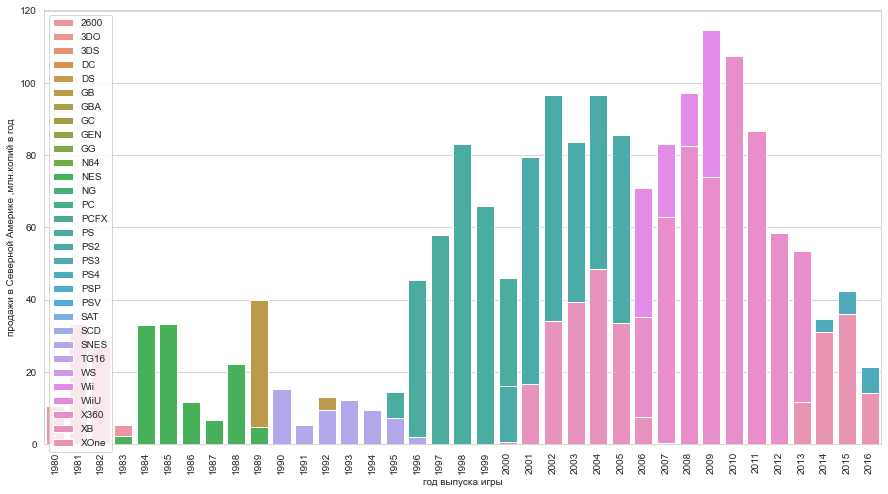

In [60]:
# na_sales	eu_sales	jp_sales
# сгруппируем данные по платформе и году, и посчитаем суммарно продажи na_sales:
df_sales_platforms_na = data.groupby(['platform', 'year']).agg(sales=('na_sales', 'sum')).reset_index()
display(df_sales_platforms_na.head())
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.barplot(data=df_sales_platforms_na, x="year",
            y="sales", hue="platform", ci=None, dodge=False)
plt.xticks(rotation=90)
plt.ylabel('продажи в Северной Америке ,млн.копий в год')
plt.xlabel('год выпуска игры')
# Add a legend and informative axis label
plt.legend(loc="upper left")

В Северной Америке продажи также, как и во всей группе суммарно, выросли с 1996 года. Но мы помним, что актуальным периодом для анализа был определен период с 2006 по 2016 годы.

#### Топ 5 платформ в Северной Америке

In [61]:
# посчитаем продажи по каждой платформе и выведем их по убыванию, чтобы посмотреть на 
# платформы с наибольшими суммарными продажами:
df_total_na_sales_platforms = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index().head()
df_total_na_sales_platforms

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


**Итак, по продажам в Северной Америке лидируют платформы: PS4, XOne, X360, PS3, 3DS.

Сравним доли продаж в Америке по отношению к общему распределению. Сделаем это в два этапа:

- Сначала соединим таблицы по платформе,
- затем рассчитаем долю.

In [62]:
# объединим таблицы методом merge()
#top5_total_sales = df_total_sales_platforms.head()
# df_total_sales_platforms - платформы с суммарными продажами 
df_total_vs_na = df_total_sales_platforms.merge(df_total_na_sales_platforms, on='platform', how='right')
#df_total_vs_na = top5_total_sales.merge(df_total_na_sales_platforms, on='platform', how='outer')
# df_total_vs_na
df_total_vs_na['dolya'] = (df_total_vs_na['na_sales']*100/df_total_vs_na['total_sales'])
df_total_vs_na


,platform,total_sales,na_sales,dolya
0,PS4,314.14,108.74,34.62
1,XOne,159.32,93.12,58.45
2,X360,961.24,81.66,8.50
3,PS3,931.34,63.50,6.82
4,3DS,257.81,38.20,14.82


In [63]:
df_total_vs_na.describe()

,total_sales,na_sales,dolya
count,5.00,5.00,5.00
mean,524.77,77.04,24.64
std,388.91,27.28,21.89
min,159.32,38.20,6.82
25%,257.81,63.50,8.50
50%,314.14,81.66,14.82
75%,931.34,93.12,34.62
max,961.24,108.74,58.45


Доля продаж в Америке по отношению к общим продажам составила от 6,8% до 58,5, в среднем 25%.

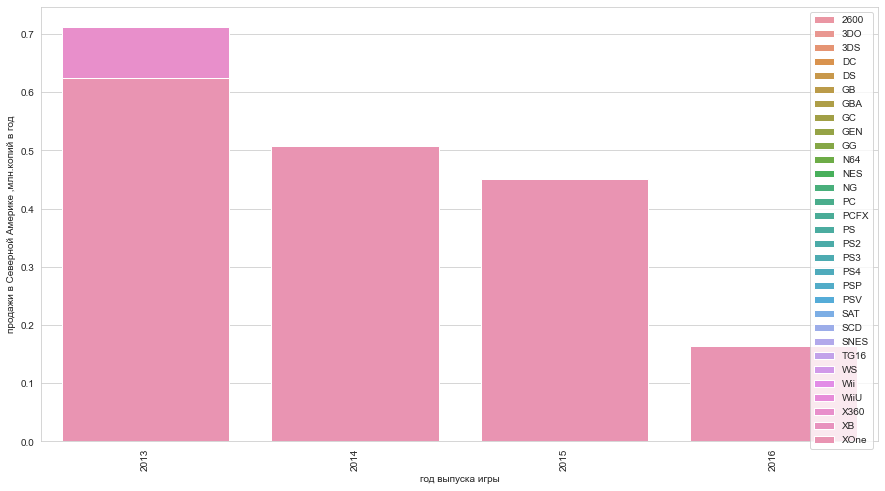

In [64]:
# df_sales_platforms_na = data.groupby(['platform', 'year']).agg(sales=('na_sales', 'sum')).reset_index()
# df_sales_platforms_na

#df_na_top = data_actual[data_actual['platform'].isin(("PS2", "X360", "PS3", "Wii", "DS"))]
df_na_top = data_actual[data_actual['platform'].isin(("PS4", "XOne", "X360", "PS3", "3DS"))]
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.barplot(data=df_na_top, x="year",
            y="na_sales", hue="platform", ci=None, dodge=False)
plt.xticks(rotation=90)
plt.ylabel('продажи в Северной Америке ,млн.копий в год')
plt.xlabel('год выпуска игры')
# Add a legend and informative axis label
plt.legend(loc="upper right")

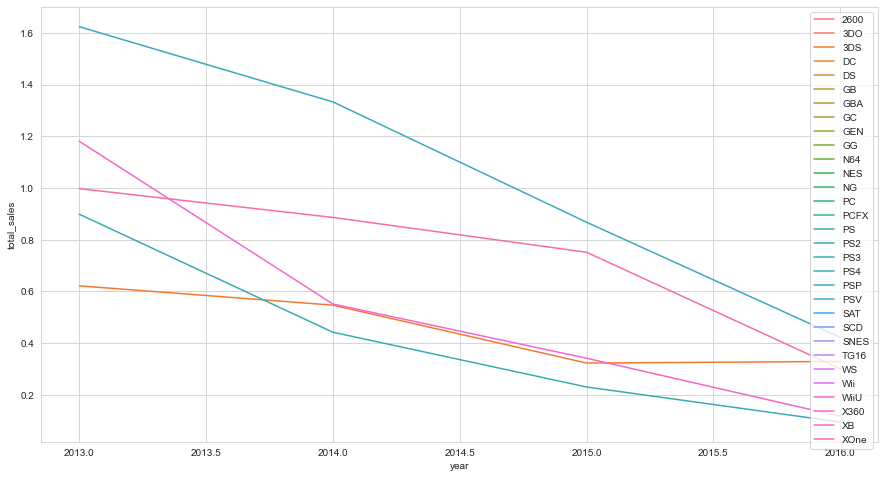

In [65]:
# построим линейный график изменения продаж по годам в данных платформах:
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.lineplot(data=df_na_top, x='year', y='total_sales', hue='platform', ci=None)
plt.legend(loc="upper right")

По всем топ 5 платформам наблюдается снижение продаж к 2016 году.

Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### рейтинг ESRB.

Напомним, что рейтинг ассоциации Entertainment Software Rating Board  делится на 8 типов, где:
- **«E» («Everyone») — «Для всех»** (Первоначально "K-A" ("Kids to Adults")): Содержание вполне подходит для возрастной категории от 6 лет. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.
- **«T» («Teen») — «Подросткам»**: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- **«M» («Mature») — «Для взрослых»**: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.
- **«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»**: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 
- **«EC» («Early childhood») — «Для детей младшего возраста»**: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. 
- **«RP» («Rating Pending») — «Рейтинг ожидается»**: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.
- **«K-A» ("Kids to Adults")** - то же самое, что и «E», то есть «Для всех».
- **«AO» («Adults Only 18+»)** — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением.

In [66]:
# напомним себе общий вид исходной таблицы, где имеется рейтинг ассоциации ESRB
data_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
16,Grand Theft Auto V,PS3,2013-01-01,Action,7.02,9.09,0.98,3.96,97.00,8.2,M,2013,21.05
23,Grand Theft Auto V,X360,2013-01-01,Action,9.66,5.14,0.06,1.41,97.00,8.1,M,2013,16.27
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,to be determined,2015,14.63
33,Pokemon X/Pokemon Y,3DS,2013-01-01,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,to be determined,2013,14.60
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.00,8.3,M,2014,12.62


Text(0.5, 0, 'ESRB rating')

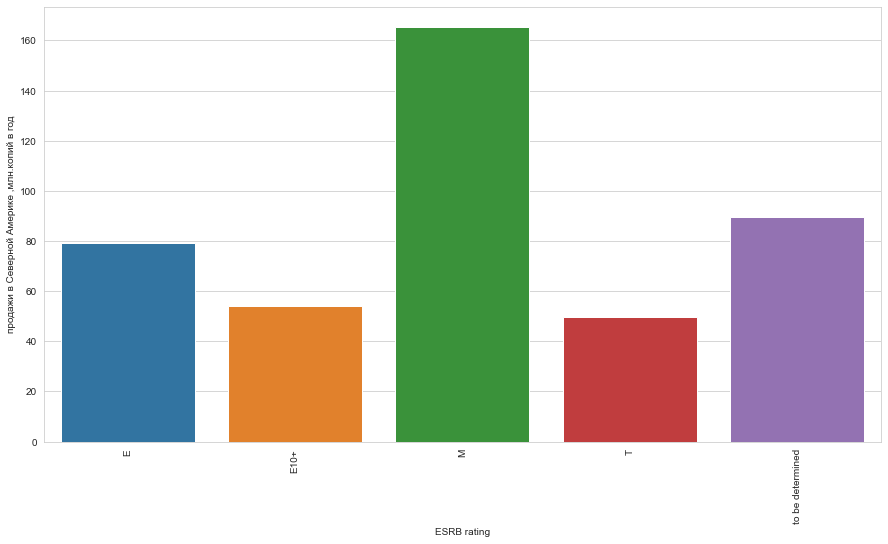

In [67]:
# сгруппируем данные по рейтингу, и посчитаем суммарно продажи na_sales:
df_sales_rating_na = data_actual.groupby(['rating']).agg(sales=('na_sales', 'sum')).reset_index()
df_sales_rating_na
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.barplot(data=df_sales_rating_na, x="rating",
            y="sales") #, hue="rating", ci=None, dodge=False)
plt.xticks(rotation=90)
plt.ylabel('продажи в Северной Америке ,млн.копий в год')
plt.xlabel('ESRB rating')
# Add a legend and informative axis label
# plt.legend(loc="upper right")

Судя по графику, в Америке:
1. наибольшие продажи дают игры с рейтингом М (взрослые). 
2. Второе место занимают игры со статусом жидания рейтинга (to be determined). 
3. Третье место заняла категория E - для всех. 
4. За ними следуют игры с категорией E10+(Для всех от 10 лет и старше).
5. Последнее место занимают игры со статусом Т(подростки)о.

#### топ жанров в Америке

In [68]:
genre_sales_na = data_actual.groupby('genre')['na_sales'].median().sort_values(ascending=False).reset_index()
genre_sales_na
# genre_sales.plot(x='year', y='sales_median', kind='bar', label="genre", title='Median Sales per Genre', figsize=(15,10),grid=True)

,genre,na_sales
0,Shooter,0.20
1,Platform,0.09
2,Sports,0.08
3,Fighting,0.04
4,Racing,0.03
5,Action,0.02
6,Role-Playing,0.02
7,Misc,0.01
8,Adventure,0.00
9,Puzzle,0.00


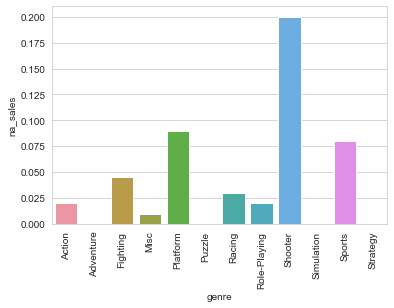

In [69]:
sns.barplot(data=genre_sales_na,y='na_sales',x='genre')
plt.xticks(rotation=90);

В Америке игры с точки зрения популярности по жанрам распределились следующим образом:
1. Shooter
2. Platform
3. Sports
4. Fighting
5. Racing

### Регион Европа

#### Общий анализ

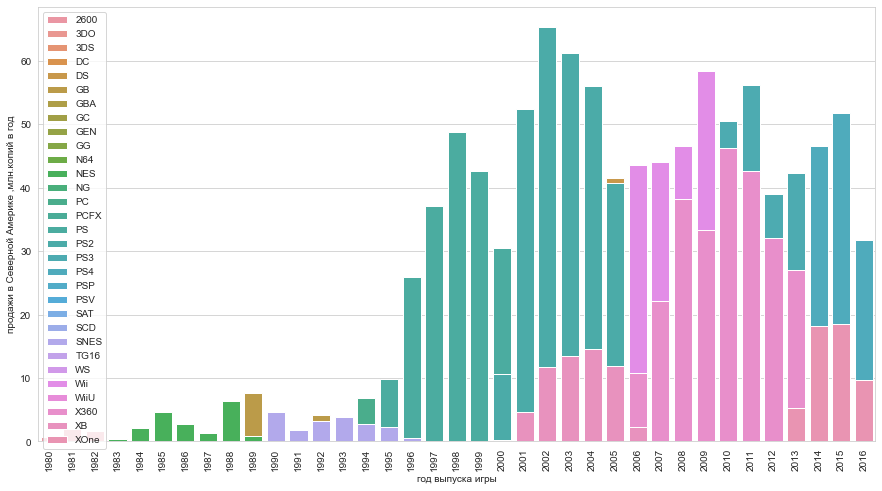

In [70]:
# сгруппируем данные по платформе и году, и посчитаем суммарно продажи eu_sales:
df_sales_platforms_eu = data.groupby(['platform', 'year']).agg(sales=('eu_sales', 'sum')).reset_index()
df_sales_platforms_eu
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.barplot(data=df_sales_platforms_eu, x="year",
            y="sales", hue="platform", ci=None, dodge=False)
plt.xticks(rotation=90)
plt.ylabel('продажи в Северной Америке ,млн.копий в год')
plt.xlabel('год выпуска игры')
# Add a legend and informative axis label
plt.legend(loc="upper left")

В Европе продажи также, как и в Северной Америке и во всей группе суммарно, выросли с 1996 года. Выделим топ-5 платформ в актуальном периоде для анализа: с 2006 по 2016 годы.

#### Топ 5 платформ в Европе

In [71]:
# посчитаем продажи по каждой платформе и выведем их по убыванию, чтобы посмотреть на 
# платформы с наибольшими суммарными продажами:
df_total_eu_sales_platforms = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()
df_total_eu_sales_platforms

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


**Итак, по продажам в Европе лидируют платформы: PS4, PS3, XOne, X360, 3DS. 

Сравним доли продаж в Европе по отношению к общему распределению. Сделаем это в два этапа:

- Сначала соединим таблицы по платформе,
- затем рассчитаем долю.

In [72]:
# объединим таблицы методом merge()
# top5_total_sales = df_total_sales_platforms.head()

df_total_vs_eu = df_total_sales_platforms.merge(df_total_eu_sales_platforms, on='platform', how='right')
# df_total_vs_na
df_total_vs_eu['dolya'] = (df_total_vs_eu['eu_sales']*100/df_total_vs_eu['total_sales'])
df_total_vs_eu

,platform,total_sales,eu_sales,dolya
0,PS4,314.14,141.09,44.91
1,PS3,931.34,67.81,7.28
2,XOne,159.32,51.59,32.38
3,X360,961.24,42.52,4.42
4,3DS,257.81,30.96,12.01


In [73]:
df_total_vs_eu.describe()

,total_sales,eu_sales,dolya
count,5.00,5.00,5.00
mean,524.77,66.79,20.20
std,388.91,43.66,17.62
min,159.32,30.96,4.42
25%,257.81,42.52,7.28
50%,314.14,51.59,12.01
75%,931.34,67.81,32.38
max,961.24,141.09,44.91


Доля продаж в Европе по отношению к общим продажам составила от 4.42% до 45%, в среднем 20%.

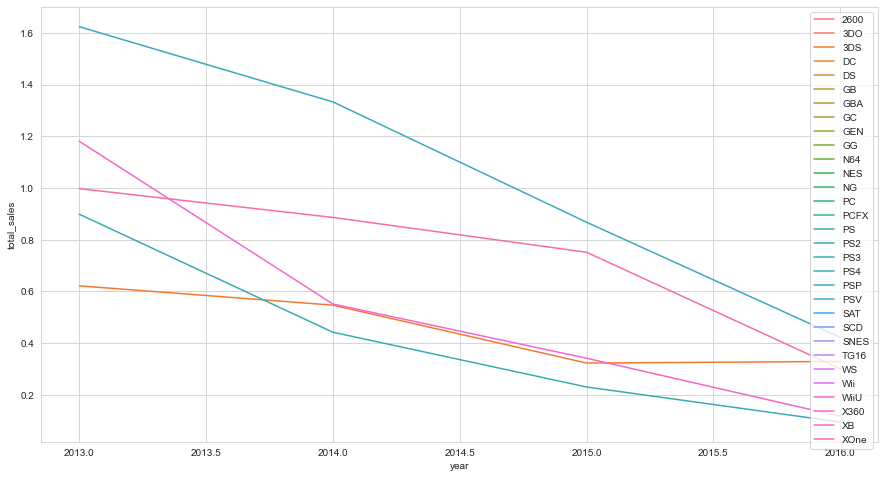

In [74]:
# построим линейный график изменения продаж по годам в данных платформах:
#df_eu_top = data_actual[data_actual['platform'].isin(("PS4", "X360", "PS3", "Wii", "DS"))]

# PS4, PS3, XOne, X360, 3DS - с учетом нового сформулированного актуального периода:
df_eu_top = data_actual[data_actual['platform'].isin(("PS4", "X360", "PS3", "XOne", "3DS"))]

plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.lineplot(data=df_eu_top, x='year', y='total_sales', hue='platform', ci=None)
plt.legend(loc="upper right")

По всем топ 5 платформам наблюдается снижение продаж к 2016 году. Мы знаем, что в 2016 году данные не полные, поэтому возможно это не "снижение продаж", а неполнота данных.

#### Рейтинг ESRB

Text(0.5, 0, 'ESRB rating')

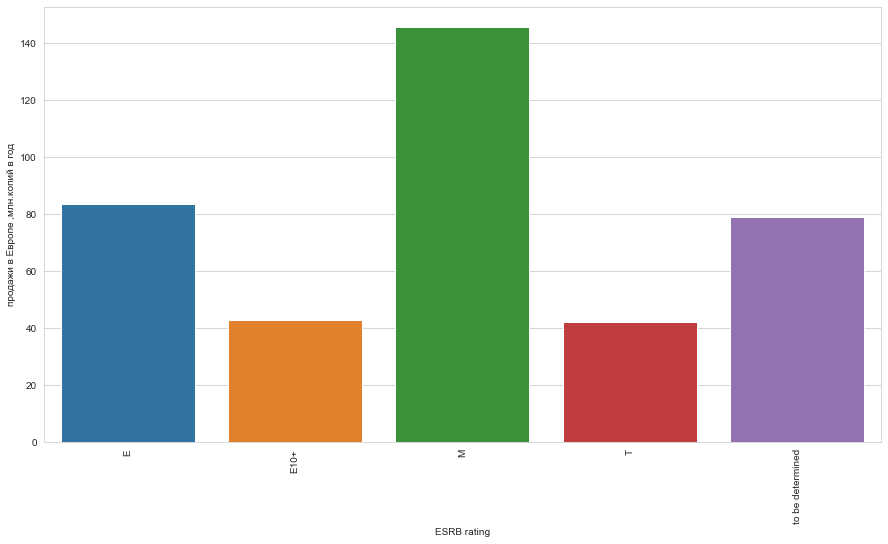

In [75]:
# сгруппируем данные по рейтингу, и посчитаем суммарно продажи na_sales:
df_sales_rating_eu = data_actual.groupby(['rating']).agg(sales=('eu_sales', 'sum')).reset_index()
df_sales_rating_eu
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.barplot(data=df_sales_rating_eu, x="rating",
            y="sales") #, hue="rating", ci=None, dodge=False)
plt.xticks(rotation=90)
plt.ylabel('продажи в Европе ,млн.копий в год')
plt.xlabel('ESRB rating')
# Add a legend and informative axis label
# plt.legend(loc="upper right")

Судя по графикy, в Европе:
1. наибольшие продажи дают игры с рейтингом M - для взрослых. 
2. Второе место занимают игры категории E - для всех.
3. Третье место со статусом ожидания рейтинга (to be determined).
4. на 4ом месте - E10(Для всех от 10 лет и старше).
5. За ними следуют игры с категорией досталось категории Т(подростки).

#### топ жанров в Европе

In [76]:
genre_sales_eu = data_actual.groupby('genre')['eu_sales'].median().sort_values(ascending=False).reset_index()
genre_sales_eu

,genre,eu_sales
0,Shooter,0.19
1,Platform,0.08
2,Racing,0.06
3,Sports,0.05
4,Simulation,0.04
5,Strategy,0.03
6,Action,0.02
7,Fighting,0.02
8,Misc,0.01
9,Role-Playing,0.01


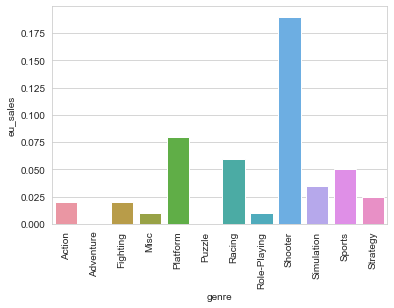

In [77]:
sns.barplot(data=genre_sales_eu,y='eu_sales',x='genre')
plt.xticks(rotation=90);

В Европе игры с точки зрения популярности по жанрам распределились следующим образом:
1. Shooter
2. Platform
3. Racing
4. Sports
5. Simulation

### Регион Япония

#### Общий анализ

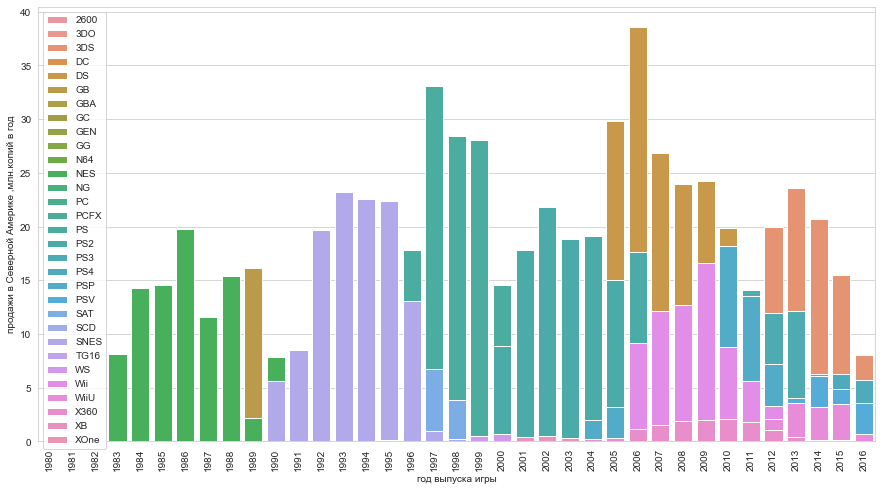

In [78]:
 # na_sales	eu_sales	jp_sales
# сгруппируем данные по платформе и году, и посчитаем суммарно продажи jp_sales:
df_sales_platforms_jp = data.groupby(['platform', 'year']).agg(sales=('jp_sales', 'sum')).reset_index()
df_sales_platforms_jp
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.barplot(data=df_sales_platforms_jp, x="year",
            y="sales", hue="platform", ci=None, dodge=False)
plt.xticks(rotation=90)
plt.ylabel('продажи в Северной Америке ,млн.копий в год')
plt.xlabel('год выпуска игры')
# Add a legend and informative axis label
plt.legend(loc="upper left")

График распределения годовых продаж в Японии по платформам  показывает иную картину в отличие от Америки и Европы. Здесь в начале 2000-ных годов произошел резкий спад продаж, затем медленный рост и пик пришелся на 2006 год. Чтобы сравнить с другими регионами и в целом по группе, будем приедрживаться тех же периодов выборки.

#### Топ 5 платформ в Японии

In [79]:
# посчитаем продажи по каждой платформе и выведем их по убыванию, чтобы посмотреть на 
# платформы с наибольшими суммарными продажами:
df_total_jp_sales_platforms = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()
df_total_jp_sales_platforms

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


Как мы увидели вначале анализа, регион Япония отличается от других.

Этот вывод также подтверждают **топ-5 платформ по Японии:
3DS, PS3, PSV, PS4, WiiU.**

Сравним доли продаж в Японии по отношению к общему распределению.
Сделаем это в два этапа:
- Сначала соединим таблицы по платформе,
- затем рассчитаем долю.

In [80]:
# объединим таблицы методом merge()
# top5_total_sales = df_total_sales_platforms.head()

df_total_vs_jp = df_total_sales_platforms.merge(df_total_jp_sales_platforms, on='platform', how='right')
# df_total_vs_jp
df_total_vs_jp['dolya'] = (df_total_vs_jp['jp_sales']*100/df_total_vs_jp['total_sales'])
df_total_vs_jp

,platform,total_sales,jp_sales,dolya
0,3DS,257.81,67.81,26.30
1,PS3,931.34,23.35,2.51
2,PSV,53.81,18.59,34.55
3,PS4,314.14,15.96,5.08
4,WiiU,82.19,10.88,13.24


In [81]:
df_total_vs_jp.describe()

,total_sales,jp_sales,dolya
count,5.00,5.00,5.00
mean,327.86,27.32,16.34
std,355.23,23.08,13.77
min,53.81,10.88,2.51
25%,82.19,15.96,5.08
50%,257.81,18.59,13.24
75%,314.14,23.35,26.30
max,931.34,67.81,34.55


Доля продаж в Японии по отношению к общим продажам составила от 2.5% до 34.5%, в среднем 16.34%

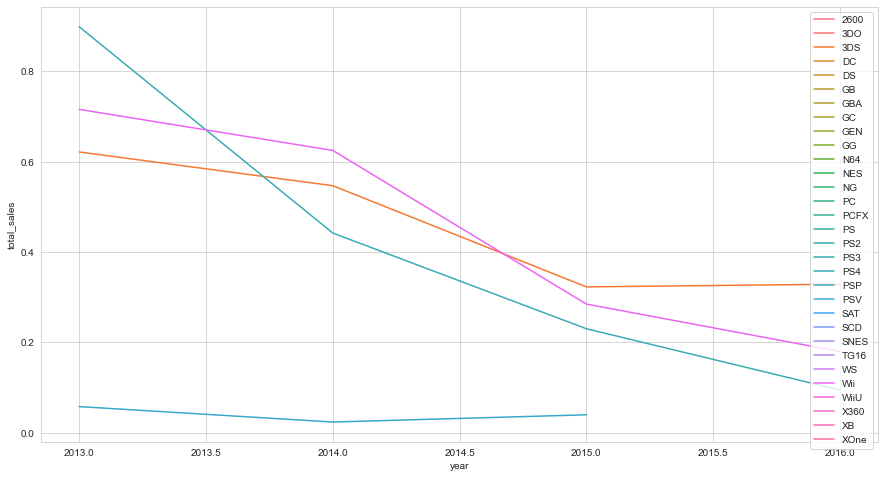

In [82]:
# построим линейный график изменения продаж по годам в данных платформах:
df_jp_top = data_actual[data_actual['platform'].isin(("PSP", "3DS", "PS3", "Wii", "DS"))]
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.lineplot(data=df_jp_top, x='year', y='total_sales', hue='platform', ci=None)
plt.legend(loc='upper right')

По всем топ 5 платформам наблюдается снижение продаж к 2016 году.

#### Рейтинг ESRB  в Японии

Text(0.5, 0, 'ESRB rating')

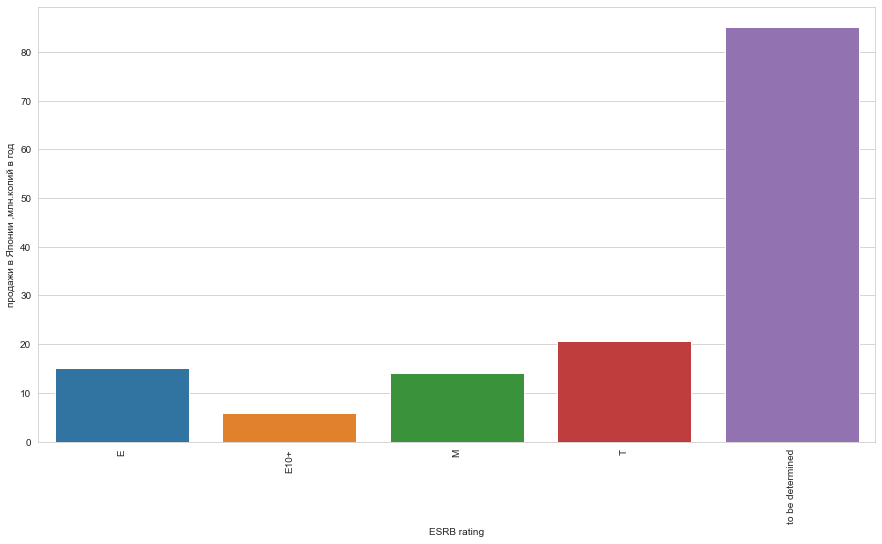

In [83]:
# сгруппируем данные по рейтингу, и посчитаем суммарно продажи na_sales:
df_sales_rating_jp = data_actual.groupby(['rating']).agg(sales=('jp_sales', 'sum')).reset_index()
df_sales_rating_jp
plt.figure(figsize = (15,8))
sns.set_style('whitegrid')
sns.barplot(data=df_sales_rating_jp, x="rating",
            y="sales") #, hue="rating", ci=None, dodge=False)
plt.xticks(rotation=90)
plt.ylabel('продажи в Японии ,млн.копий в год')
plt.xlabel('ESRB rating')
# Add a legend and informative axis label
# plt.legend(loc="upper right")

Ну, и как всегда, Япония отличилась от остальных регионов: по большому счету рейтинг ESRB здесь вообще не имеет значения, потому что большинство платформ не имеют рейтинг. А если вспомнить, что ESRB предназначен для рецензирования игр США и Канады, то можем заключить, что игры без рейтинга — это игры «отечественного» производства. И японцы отдают большее предпочтение именно им. Тем не менее кое-какое распределение мы получили, судя по графикy, в Японии:
1. to be determined
2. категория Т(подростки)E для всех
3. категория E для всех
4. категория М(взрослые)
5. категория Е10+ (дети от 10 и старше)

#### топ жанров в Японии

In [84]:
genre_sales_jp = data_actual.groupby('genre')['jp_sales'].median().sort_values(ascending=False).reset_index()
genre_sales_jp

,genre,jp_sales
0,Role-Playing,0.05
1,Fighting,0.03
2,Misc,0.02
3,Puzzle,0.02
4,Action,0.01
5,Adventure,0.01
6,Platform,0.00
7,Racing,0.00
8,Shooter,0.00
9,Simulation,0.00


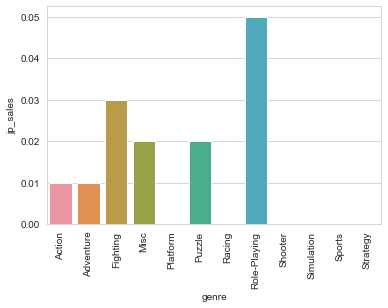

In [85]:
sns.barplot(data=genre_sales_jp,y='jp_sales',x='genre')
plt.xticks(rotation=90);

В Японии игры с точки зрения популярности по жанрам распределились следующим образом:
1. Role-Playing
2. Fighting
3. Misc
4. Puzzle
5. Action

### Общий вывод по регионам.

Итак, сравнение долей по регионам говорит о том, что наибольшие продажи по топ-5 платформам приходятся на Америку - их доля в общих продажах составила в среднем 42%. В Европе средний % составил около 31%. Япония по продажам на последнем месте, их доля составила около 19% по среднему значению.

## Проверка гипотез

**План:**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.


### Гипотеза №1: Средние пользовательские рейтинги платформ XOne и PC одинаковые

Примем за нулевую гипотезу H₀ утверждение средние пользовательские рейтинги платформ XOne и PC равны. Тогда альтернативной гипотезой H₁ будет утверждение, что они не равны.

Проведем двухсторонний ttest.

In [86]:
display(data['platform'].value_counts())

PS2     2126
DS      2119
PS3     1306
Wii     1284
X360    1232
PSP     1193
PS      1190
PC       954
GBA      811
XB       802
GC       541
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [87]:
# сделаем подготовку данных к реализации гипотезы
df = data_actual.query('user_score!="tbd"')
df['user_score'] = pd.to_numeric(df['user_score'])

df_xbox = df.query('platform == "XOne"')['user_score'] # подвыборка по  XOne 
df_pc = df.query('platform == "PC"')['user_score'] # подвыборка по PC

In [88]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
# p-value - 'Э'то вероятность получить наблюдаемый или ещё более далёкий от предполагаемого результат при условии,
# что нулевая гипотеза верна. 

results = st.ttest_ind(df_xbox, df_pc)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: nan
Не получилось отвергнуть нулевую гипотезу


In [89]:
print('средний пользовательский рейтинг платформы XOne:', df_xbox.mean()) 
print('средний пользовательский рейтинг платформы PC:', df_pc.mean())

средний пользовательский рейтинг платформы XOne: 6.521428571428572
средний пользовательский рейтинг платформы PC: 6.269677419354839


**Итак, средние пользовательские рейтинги платформ XOne и PC равны.**

### Гипотеза №2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Примем за нулевую гипотезу H₀ утверждение средние пользовательские рейтинги жанров Action  и Sports равны. Тогда альтернативной гипотезой H₁ будет утверждение, что они не равны.

Проведем двухсторонний ttest.

In [90]:
df_action = df.query('genre == "Action"')['user_score'] # подвыборка по  XOne 
df_sports = df.query('genre == "Sports"')['user_score'] # подвыборка по PC

alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
# p-value - 'Э'то вероятность получить наблюдаемый или ещё более далёкий от предполагаемого результат при условии,
# что нулевая гипотеза верна. 

results = st.ttest_ind(df_action, df_sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 


p-значение: nan
Не получилось отвергнуть нулевую гипотезу


In [91]:
print('средний пользовательский рейтинг в жанре Action:', df_action.mean()) 
print('средний пользовательский рейтинг в жанре Sports:', df_sports.mean())

средний пользовательский рейтинг в жанре Action: 6.837532133676092
средний пользовательский рейтинг в жанре Sports: 5.238125


**Итак, средние пользовательские рейтинги в жанрах Action и Sports не равны.**

## Общий вывод

Итак, глобально по продажам лидируют платформы: PS4, PS3, XOne, 3DS, X360.

Регионально:
- в Северной Америке: PS4, XOne, X360, PS3, 3DS..
- в Европе лидируют платформы: PS4, PS3, XOne, X360, 3DS
- Японии: 3DS, PS3, PSV, PS4, Wii

Из них совпадения имеются по : PS4, PS3, 3DS. Получается, это наиболее популярные и "живучие" платформы.
Тем не менее по продажам как глобально, так и локально наблюдается спад.